# Pequeño análisis de datos antes de Streamlit

En este notebook, solo vamos a realizar un pequeño análisis exploratorio del dataset [Penguins](https://github.com/allisonhorst/penguins).

La idea poder utilizar este procesamiento como base para constuir nuestra aplicación en Streamlit.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Para cargar el dataset Penguins, utilizamos la librería Seaborn:

In [ ]:
df = sns.load_dataset("penguins")

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Chequeamos la presencia de valores nulos y los eliminamos:

In [ ]:
# Columnas con valores nulos
df.isna().any(axis=0)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [ ]:
# Filas con valores nulos
df.loc[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Decidimos tratar las filas con nulos eliminándolas:

In [ ]:
df = df.loc[~df["sex"].isna()]

Confirmemos que no nos quedan nulos en ninguna columna

In [ ]:
df.isna().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

Veamos una descripción de nuestros datos:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


## Análisis y procesamiento de datos

Primero transformamos las columnas categóricas a columnas numéricas, con distintas técnicas.

Como "sex" solo puede tener dos valores, basta con codificaar uno de ellos como 0 y el otro como 1

In [ ]:
df["sex"] = df["sex"].replace({"Male": 0, "Female": 1})

Como "island" puede tener más de dos valores, ocupamos una codificación de tipo "one-hot"

In [ ]:
df["island"].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [ ]:
islands = pd.get_dummies(df["island"])
islands

,Biscoe,Dream,Torgersen
0,False,False,True
1,False,False,True
2,False,False,True
4,False,False,True
5,False,False,True
...,...,...,...
338,True,False,False
340,True,False,False
341,True,False,False
342,True,False,False


Ahora volvemos a juntar todos los valores (ahora numéricos) en un solo dataframe:

In [ ]:
df = pd.concat([df, islands], axis=1)
df = df.drop("island", axis=1)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,False,False,True
1,Adelie,39.5,17.4,186.0,3800.0,1,False,False,True
2,Adelie,40.3,18.0,195.0,3250.0,1,False,False,True
4,Adelie,36.7,19.3,193.0,3450.0,1,False,False,True
5,Adelie,39.3,20.6,190.0,3650.0,0,False,False,True


In [ ]:
df.drop("species", axis=1).corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,-0.344078,0.225174,0.032118,-0.367821
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.372673,-0.626230,0.457326,0.265173
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,-0.255169,0.601126,-0.425459,-0.273304
body_mass_g,0.589451,-0.472016,0.872979,1.000000,-0.424987,0.623702,-0.464666,-0.251369
sex,-0.344078,-0.372673,-0.255169,-0.424987,1.000000,-0.009201,0.000673,0.012278
Biscoe,0.225174,-0.626230,0.601126,0.623702,-0.009201,1.000000,-0.749398,-0.396949
Dream,0.032118,0.457326,-0.425459,-0.464666,0.000673,-0.749398,1.000000,-0.310248
Torgersen,-0.367821,0.265173,-0.273304,-0.251369,0.012278,-0.396949,-0.310248,1.000000


<Axes: xlabel='species'>

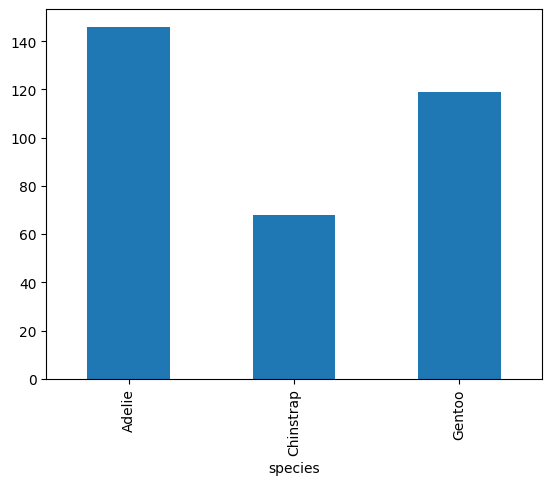

In [ ]:
df.groupby("species").size().plot(kind="bar")

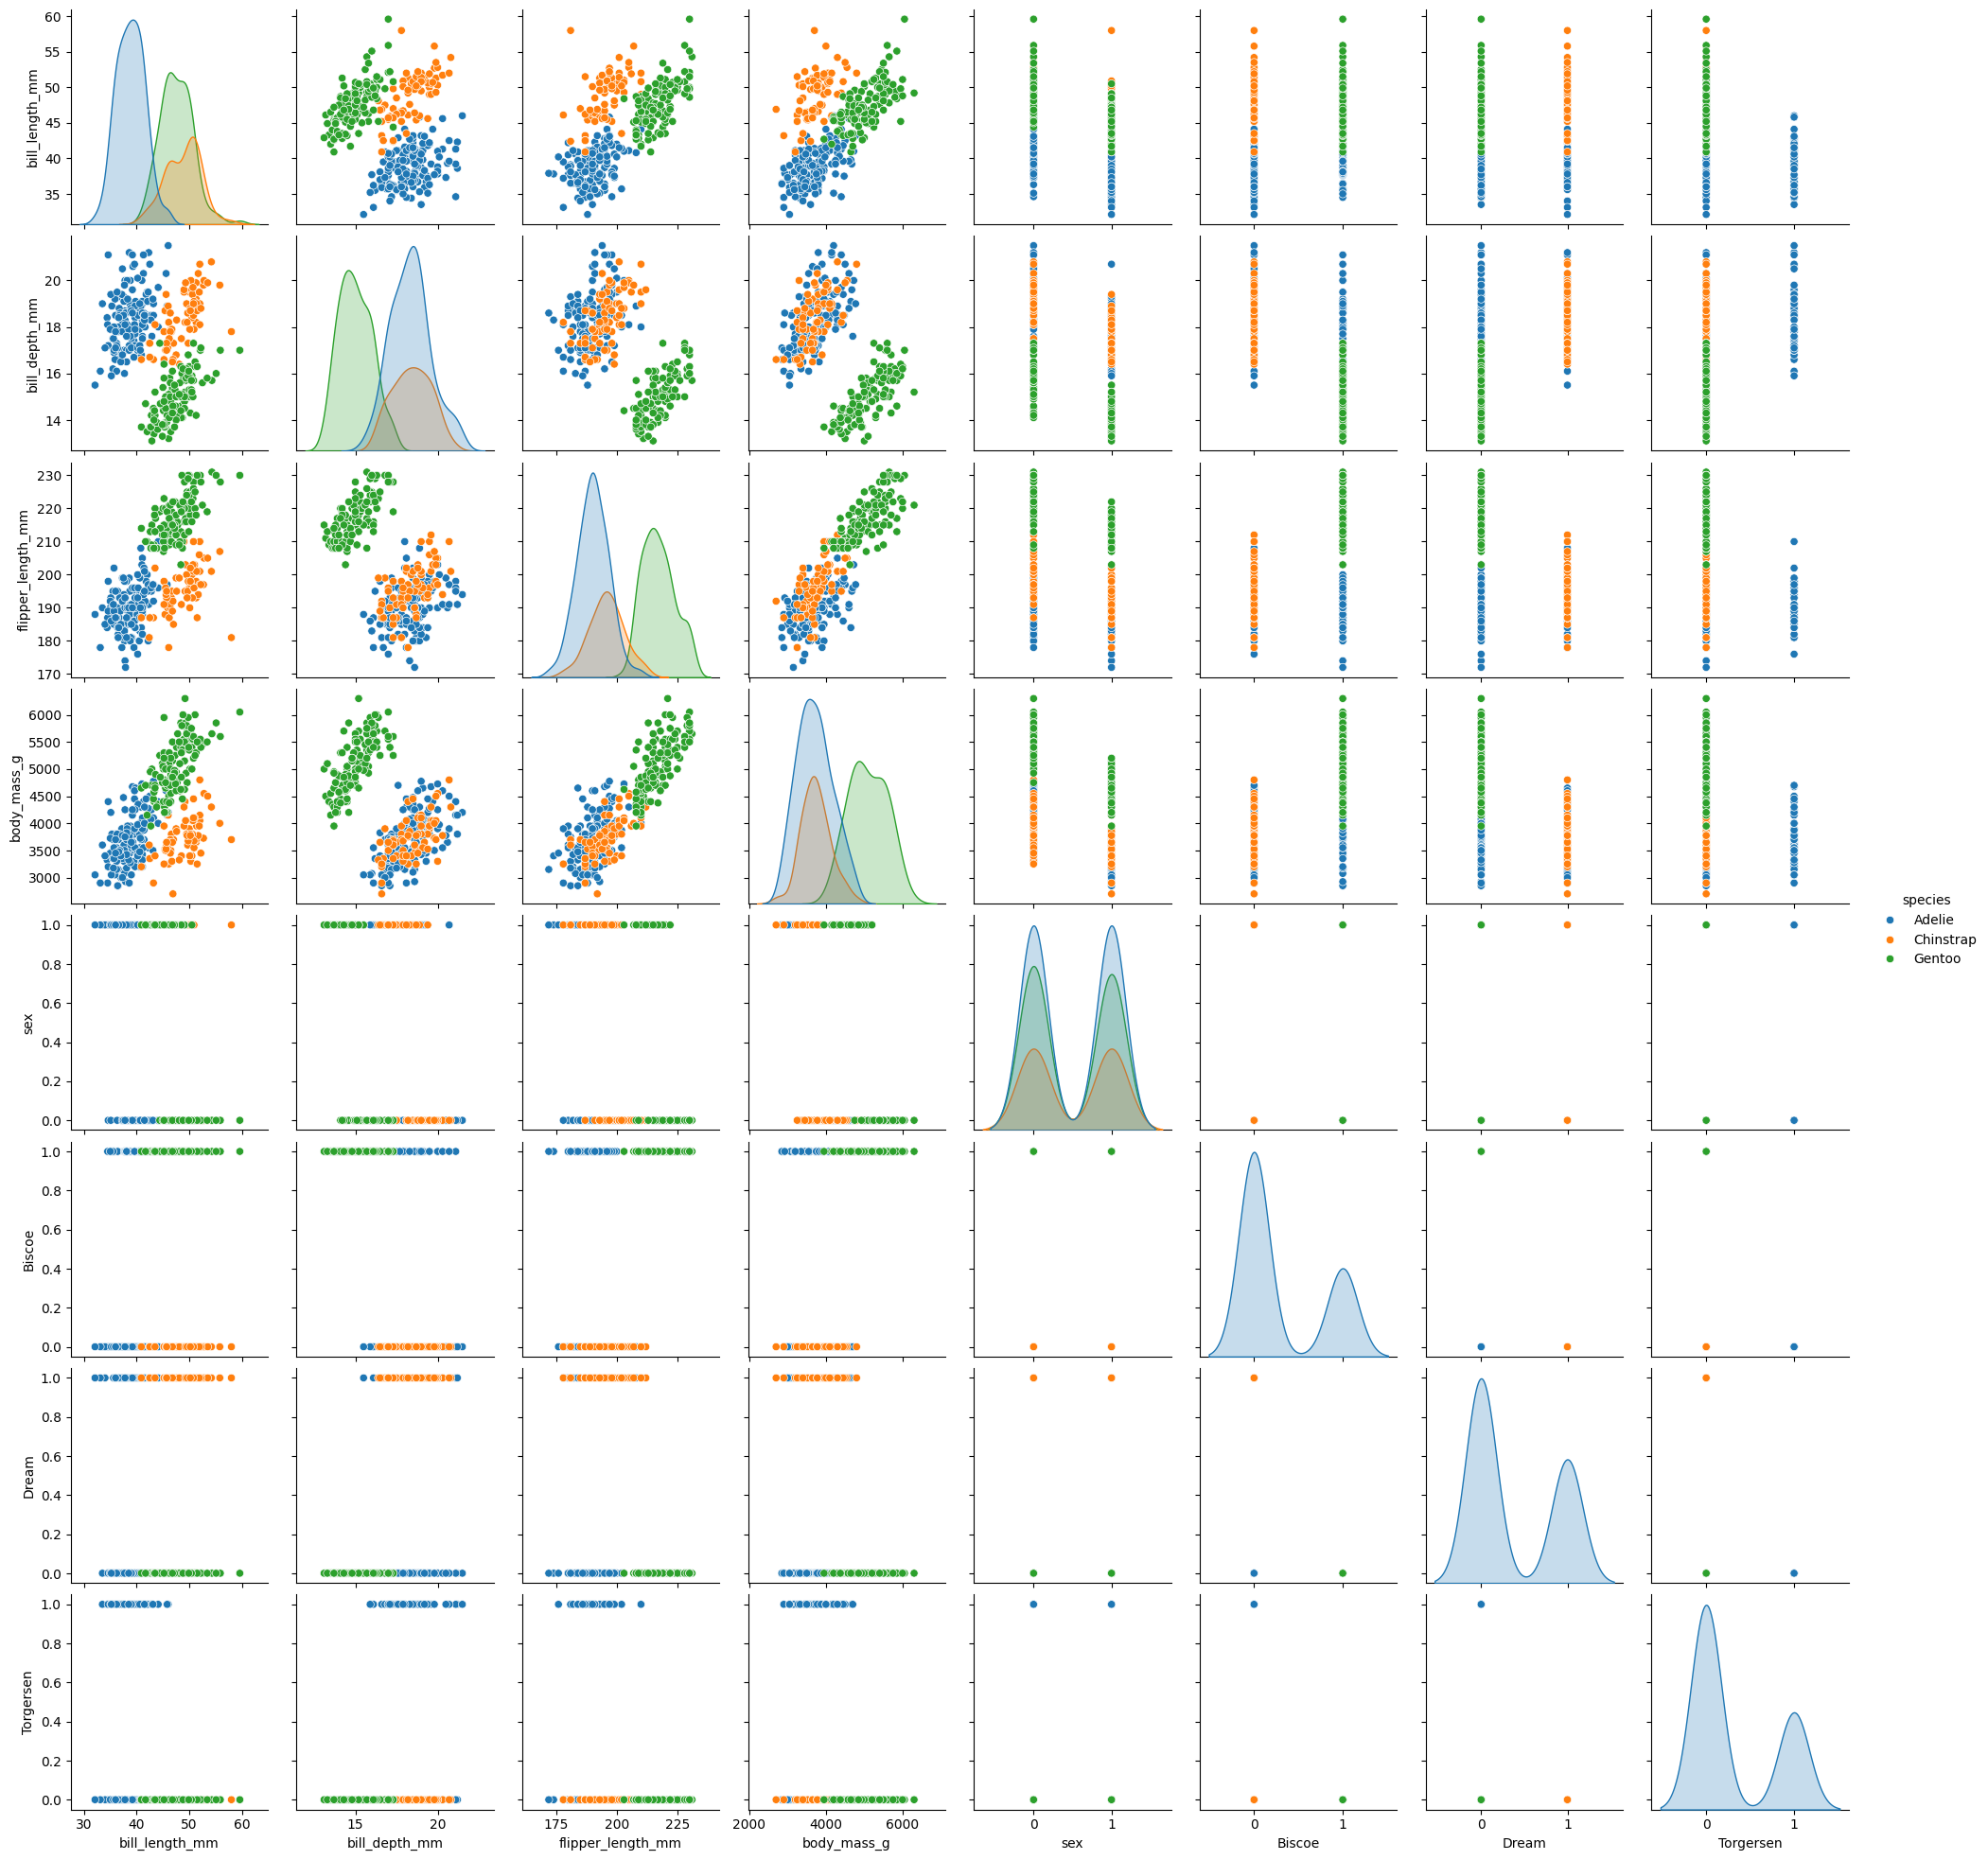

In [ ]:
sns.pairplot(df, hue="species")

Ahora separamos los datos


In [ ]:
y = df["species"]
X = df.drop("species", axis=1)

In [ ]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,False,False,True
1,39.5,17.4,186.0,3800.0,1,False,False,True
2,40.3,18.0,195.0,3250.0,1,False,False,True
4,36.7,19.3,193.0,3450.0,1,False,False,True
5,39.3,20.6,190.0,3650.0,0,False,False,True
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,True,False,False
340,46.8,14.3,215.0,4850.0,1,True,False,False
341,50.4,15.7,222.0,5750.0,0,True,False,False
342,45.2,14.8,212.0,5200.0,1,True,False,False


In [ ]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [ ]:
X.shape, y.shape


((333, 8), (333,))

## Gráficos para columnas numéricas

Lo primero es saber cuáles columnas contienen datos numéricos:

In [ ]:
df.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'Biscoe', 'Dream', 'Torgersen'],
      dtype='object')

In [ ]:
 df.select_dtypes('number').columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex'],
      dtype='object')

Aquí tenemos dos opciones: ocupar un histograma o una estimación de densidad.

<Axes: >

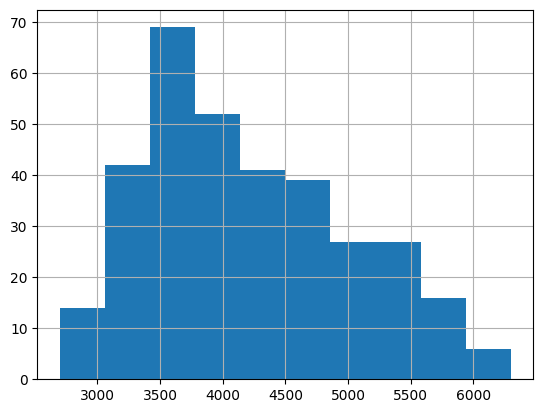

In [ ]:
df["body_mass_g"].hist()

<Axes: ylabel='Density'>

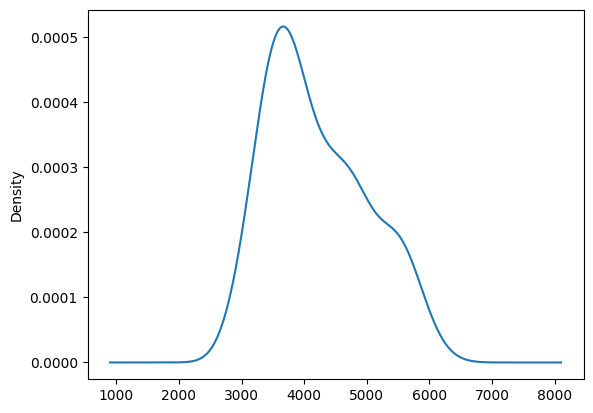

In [ ]:
df["body_mass_g"].plot.kde()

## Gráficos para responder preguntas interesantes

¿Cómo es la distribución de especies en el dataset?

<Axes: xlabel='species'>

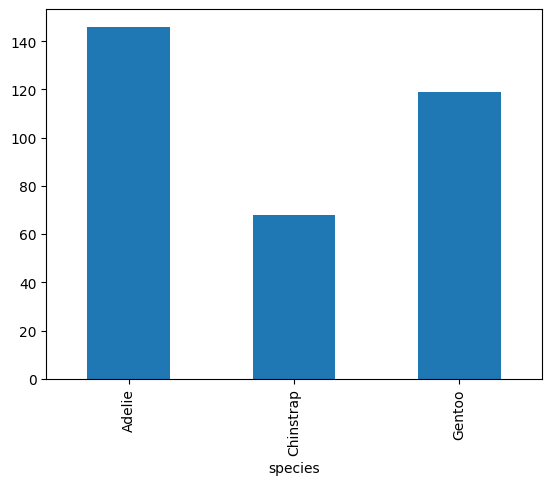

In [ ]:
# Opción 1
df.groupby("species").size().plot(kind="bar")

<Axes: xlabel='species'>

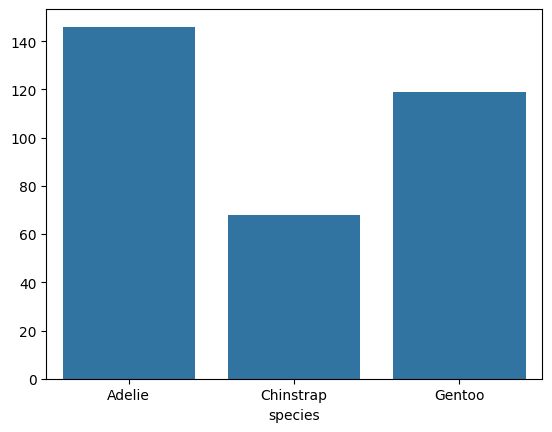

In [ ]:
# Opción 1 (con seaborn)
sns.barplot(df.groupby("species").size())

In [ ]:
# Opción 2
# df.pivot_table(values="sex", index="species", columns="island", aggfunc="count")

¿Cómo es la distribución de sexo en el dataset?

<Axes: xlabel='sex'>

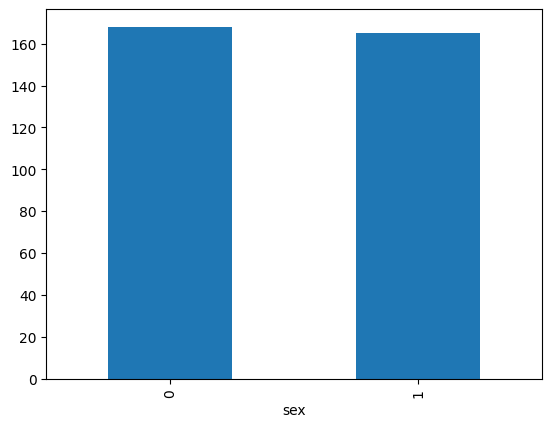

In [ ]:
df.groupby("sex").size().plot(kind="bar")

<Axes: xlabel='sex'>

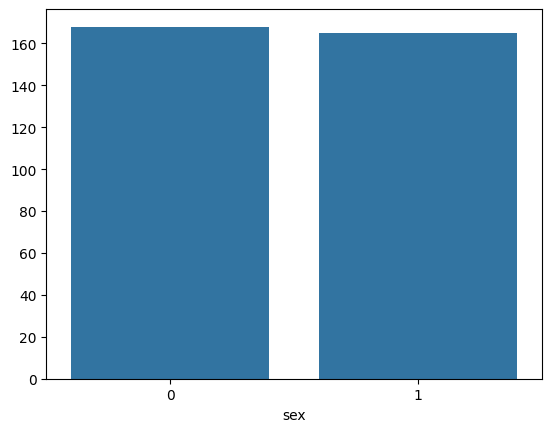

In [ ]:
# Con seaborn
sns.barplot(df.groupby("sex").size())

## Entrenar un modelo

Todos estos pasos son parte del flujo típico que ya hemos descrito y revisado varias veces:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((233, 8), (100, 8), (233,), (100,))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

Veamos cómo podemos entregarle una instancia a la vez al modelo para obtener predicciones. Tomemos un ejemplo del conjunto de test:

In [ ]:
X_test.iloc[1]

bill_length_mm         35.5
bill_depth_mm          16.2
flipper_length_mm     195.0
body_mass_g          3350.0
sex                       1
Biscoe                 True
Dream                 False
Torgersen             False
Name: 66, dtype: object

In [ ]:
y.iloc[1]

'Adelie'

In [ ]:
prediction = clf.predict(X_test)
prediction

array(['Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstr

Ahora que vimos que podemos obtener una prediccion, veamos un formato amigable de input para el modelo:

In [ ]:
X_test.iloc[:1].values

array([[50.8, 15.7, 226.0, 5200.0, 0, True, False, False]], dtype=object)

In [ ]:
sample_input = pd.DataFrame([[45.7, 17.3, 193, 3600, 1, 0, 1, 0]], columns=X.columns)

In [ ]:
clf

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
clf.predict(sample_input)

array(['Chinstrap'], dtype=object)

## Exportar el modelo

Para el proceso de eexportación utilizaremos la librería [joblib](https://joblib.readthedocs.io/en/stable/)

In [ ]:
!pip install joblib

In [ ]:
import joblib

Para serializar un modelo (almacenarlo en un archivo), utilizamos [`joblib.dump`](https://joblib.readthedocs.io/en/stable/generated/joblib.dump.html)

In [ ]:
joblib.dump(clf, "modelo.joblib")

['modelo.joblib']

Para deserializar un modelo (cargarlo desde un archivo), utilizamos [`joblib.load`](https://joblib.readthedocs.io/en/stable/generated/joblib.load.html)

In [ ]:
clf_2 = joblib.load("modelo.joblib")

Y luego podemos usar el objeto normalmente:

In [ ]:
clf_2.predict(sample_input)

array(['Chinstrap'], dtype=object)